In [4]:
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


📥 Loading sales data...
✅ Loaded 2,823 records with 25 columns



Dataset Shape: (2823, 25)

Column Types:
ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

⚠️ Missing Values Found:
ADDRESSLINE2    2521
STATE           1486
POSTALCODE        76
TERRITORY       1074
dtype: int64


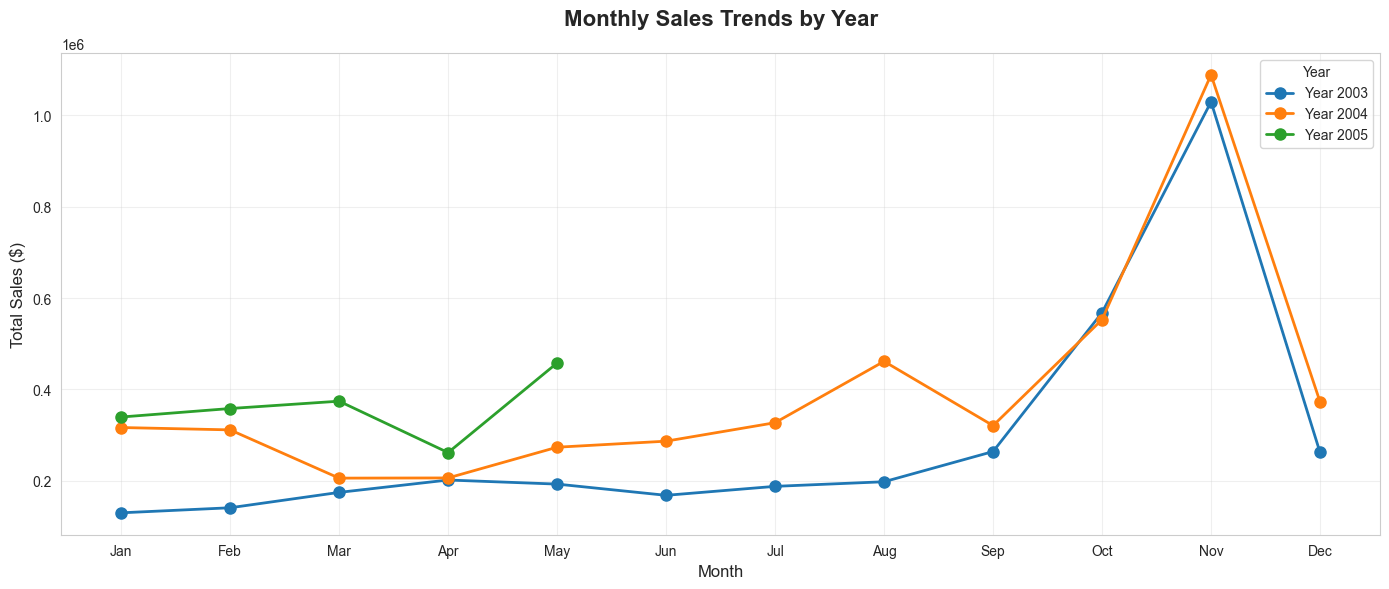

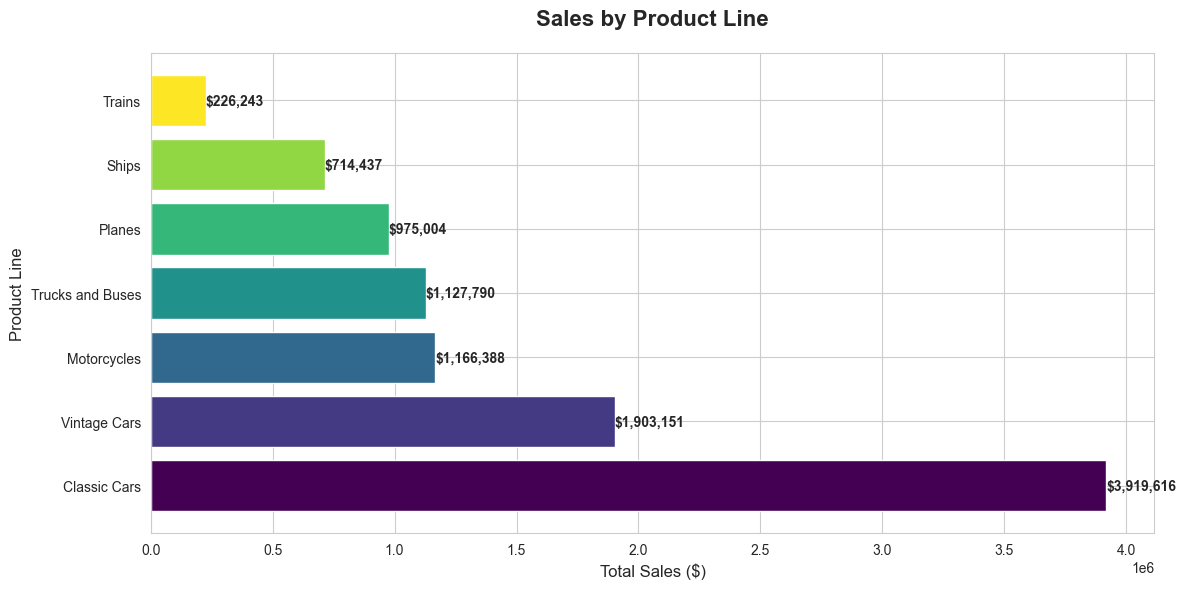

Product Line,Total Sales,Percentage
Classic Cars,"$3,919,616",39.1%
Vintage Cars,"$1,903,151",19.0%
Motorcycles,"$1,166,388",11.6%
Trucks and Buses,"$1,127,790",11.2%
Planes,"$975,004",9.7%
Ships,"$714,437",7.1%
Trains,"$226,243",2.3%


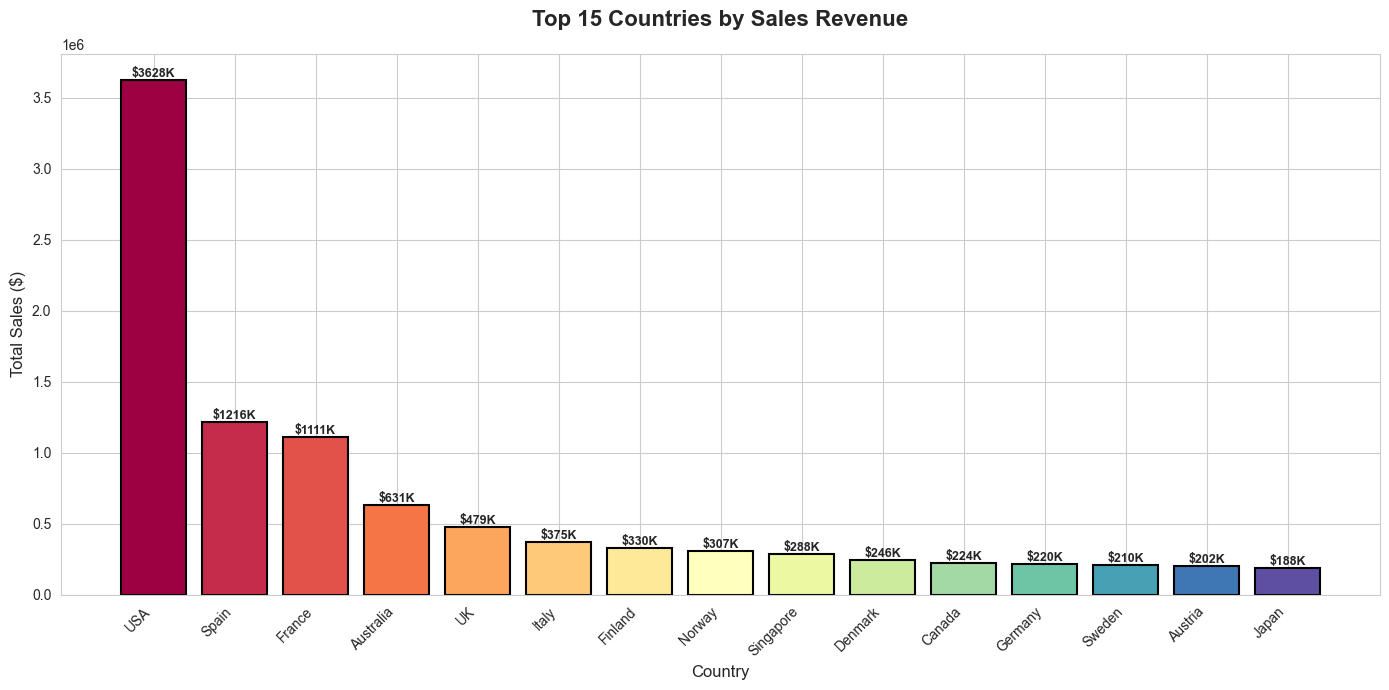

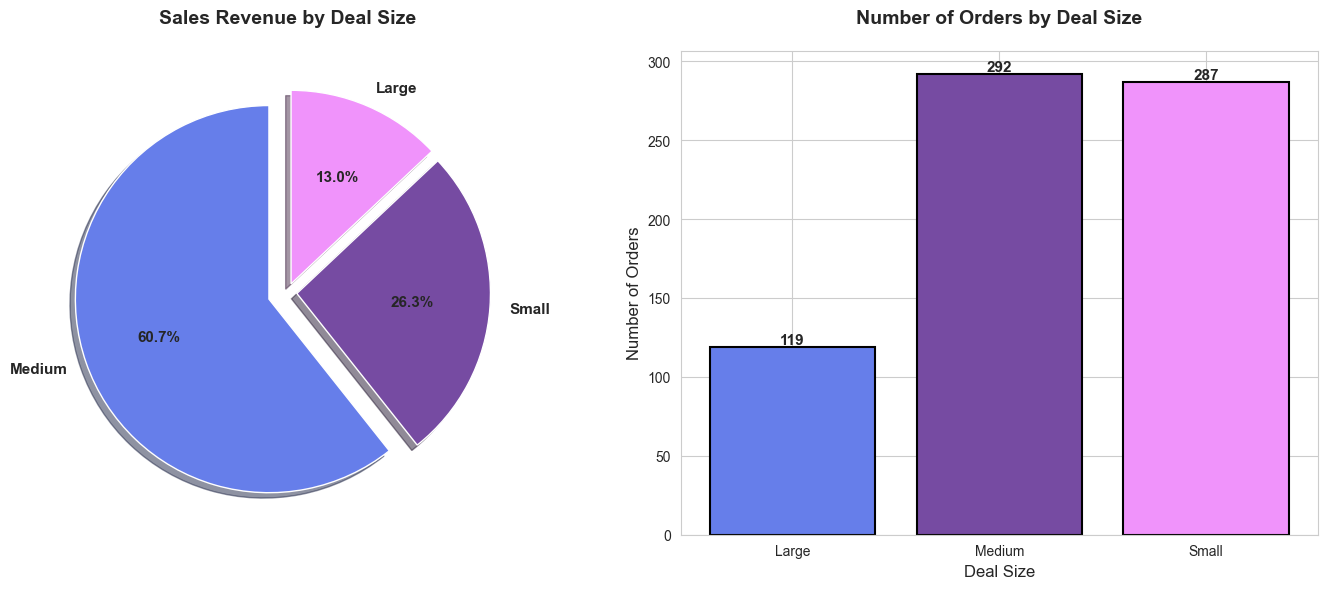

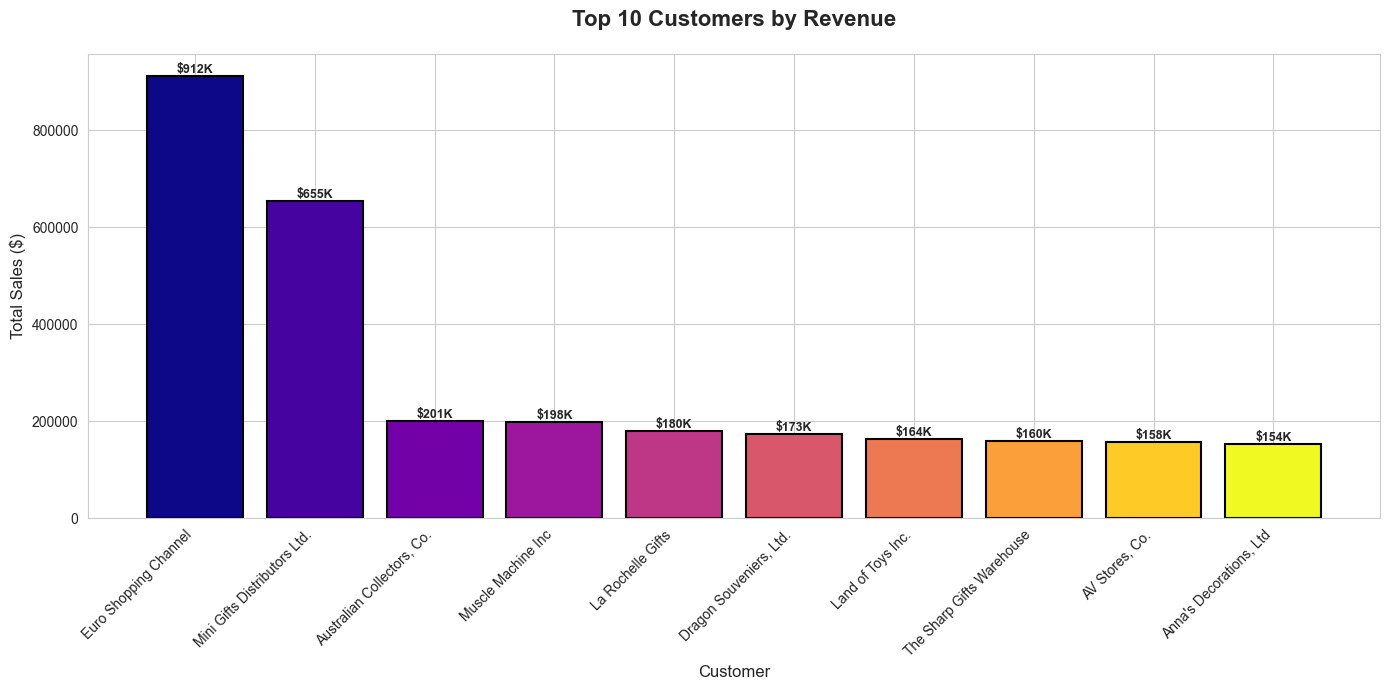

,Total Sales,Number of Orders,Total Quantity
CUSTOMERNAME,,,
Euro Shopping Channel,"$912,294",26,9327
Mini Gifts Distributors Ltd.,"$654,858",17,6366
"Australian Collectors, Co.","$200,995",5,1926
Muscle Machine Inc,"$197,737",4,1775
La Rochelle Gifts,"$180,125",4,1832
"Dragon Souveniers, Ltd.","$172,990",5,1524
Land of Toys Inc.,"$164,069",4,1631
The Sharp Gifts Warehouse,"$160,010",4,1656
"AV Stores, Co.","$157,808",3,1778


,SALES,QUANTITYORDERED,PRICEEACH
count,2823.000000,2823.000000,2823.000000
mean,3553.889072,35.092809,83.658544
std,1841.865106,9.741443,20.174277
min,482.130000,6.000000,26.880000
25%,2203.430000,27.000000,68.860000
50%,3184.800000,35.000000,95.700000
75%,4508.000000,43.000000,100.000000
max,14082.800000,97.000000,100.000000



✅ ANALYSIS COMPLETE! All visualizations and insights generated successfully.


In [5]:
"""
Sales Data Analysis & Visualization System
Complete analysis with interactive visualizations
"""

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# -----------------------------
# CUSTOM STYLING
# -----------------------------
style = """
<style>
.header {
    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
    padding: 30px;
    border-radius: 15px;
    text-align: center;
    color: white;
    margin-bottom: 30px;
}
.section-header {
    background: linear-gradient(90deg, #667eea 0%, #764ba2 100%);
    padding: 15px;
    border-radius: 10px;
    color: white;
    margin: 25px 0 15px 0;
}
.stats-container {
    display: flex;
    justify-content: space-around;
    flex-wrap: wrap;
    margin: 20px 0;
}
.stat-box {
    background: #f8f9fa;
    padding: 20px;
    border-radius: 10px;
    text-align: center;
    border-left: 5px solid #667eea;
    margin: 10px;
    min-width: 150px;
    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
}
.stat-value {
    font-size: 2rem;
    font-weight: bold;
    color: #667eea;
    margin: 5px 0;
}
.stat-label {
    color: #666;
    font-size: 0.9rem;
}
.info-box {
    background: #d1ecf1;
    border: 1px solid #bee5eb;
    color: #0c5460;
    padding: 15px;
    border-radius: 8px;
    margin: 15px 0;
}
.success-box {
    background: #d4edda;
    border: 1px solid #c3e6cb;
    color: #155724;
    padding: 15px;
    border-radius: 8px;
    margin: 15px 0;
}
.warning-box {
    background: #fff3cd;
    border: 1px solid #ffeaa7;
    color: #856404;
    padding: 15px;
    border-radius: 8px;
    margin: 15px 0;
}
table {
    border-collapse: collapse;
    width: 100%;
    margin: 15px 0;
}
th {
    background: #667eea;
    color: white;
    padding: 12px;
    text-align: left;
}
td {
    padding: 10px;
    border-bottom: 1px solid #ddd;
}
tr:hover {
    background: #f5f5f5;
}
</style>
"""

display(HTML(style))

# Display header
header_html = """
<div class="header">
    <h1 style="margin: 0; font-size: 3rem;">📊 Sales Data Analysis Dashboard</h1>
    <p style="margin-top: 10px; font-size: 1.2rem; opacity: 0.9;">
        Comprehensive analysis of sales trends, products, and customer insights
    </p>
</div>
"""
display(HTML(header_html))

# -----------------------------
# LOAD AND CLEAN DATA
# -----------------------------
print("📥 Loading sales data...")

# Load data
df = pd.read_csv('sales_data_sample.csv', encoding='cp1252')

print(f"✅ Loaded {len(df):,} records with {len(df.columns)} columns\n")

# Display initial info
display(HTML('<div class="section-header"><h2 style="margin: 0;">🔍 Data Overview</h2></div>'))

print("Dataset Shape:", df.shape)
print("\nColumn Types:")
print(df.dtypes)

# Check for missing values
missing = df.isnull().sum()
if missing.sum() > 0:
    print("\n⚠️ Missing Values Found:")
    print(missing[missing > 0])
else:
    display(HTML('<div class="success-box">✅ <strong>No missing values detected!</strong></div>'))

# -----------------------------
# DATA CLEANING
# -----------------------------
display(HTML('<div class="section-header"><h2 style="margin: 0;">🧹 Data Cleaning</h2></div>'))

# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Handle missing values
df['STATE'] = df['STATE'].fillna('Unknown')
df['ADDRESSLINE2'] = df['ADDRESSLINE2'].fillna('N/A')
df['POSTALCODE'] = df['POSTALCODE'].fillna('Unknown')

# Remove duplicates
initial_rows = len(df)
df = df.drop_duplicates()
removed_dups = initial_rows - len(df)

if removed_dups > 0:
    display(HTML(f'<div class="info-box">🔄 Removed {removed_dups} duplicate records</div>'))
else:
    display(HTML('<div class="success-box">✅ No duplicates found</div>'))

# Create additional date columns for analysis
df['YEAR'] = df['ORDERDATE'].dt.year
df['MONTH'] = df['ORDERDATE'].dt.month
df['MONTH_NAME'] = df['ORDERDATE'].dt.strftime('%B')
df['DAY_OF_WEEK'] = df['ORDERDATE'].dt.day_name()

display(HTML('<div class="success-box">✅ <strong>Data cleaning completed!</strong></div>'))

# -----------------------------
# KEY METRICS
# -----------------------------
display(HTML('<div class="section-header"><h2 style="margin: 0;">📈 Key Performance Metrics</h2></div>'))

total_sales = df['SALES'].sum()
total_orders = df['ORDERNUMBER'].nunique()
total_customers = df['CUSTOMERNAME'].nunique()
avg_order_value = df.groupby('ORDERNUMBER')['SALES'].sum().mean()
total_products = df['PRODUCTCODE'].nunique()

stats_html = f"""
<div class="stats-container">
    <div class="stat-box">
        <div class="stat-value">${total_sales:,.0f}</div>
        <div class="stat-label">Total Sales</div>
    </div>
    <div class="stat-box">
        <div class="stat-value">{total_orders:,}</div>
        <div class="stat-label">Total Orders</div>
    </div>
    <div class="stat-box">
        <div class="stat-value">{total_customers:,}</div>
        <div class="stat-label">Unique Customers</div>
    </div>
    <div class="stat-box">
        <div class="stat-value">${avg_order_value:,.0f}</div>
        <div class="stat-label">Avg Order Value</div>
    </div>
    <div class="stat-box">
        <div class="stat-value">{total_products:,}</div>
        <div class="stat-label">Unique Products</div>
    </div>
</div>
"""
display(HTML(stats_html))

# -----------------------------
# VISUALIZATION 1: MONTHLY SALES TRENDS
# -----------------------------
display(HTML('<div class="section-header"><h2 style="margin: 0;">📅 Visualization 1: Monthly Sales Trends</h2></div>'))

# Group by year and month
monthly_sales = df.groupby(['YEAR', 'MONTH'])['SALES'].sum().reset_index()
monthly_sales['YEAR_MONTH'] = monthly_sales['YEAR'].astype(str) + '-' + monthly_sales['MONTH'].astype(str).str.zfill(2)

plt.figure(figsize=(14, 6))
for year in monthly_sales['YEAR'].unique():
    year_data = monthly_sales[monthly_sales['YEAR'] == year]
    plt.plot(year_data['MONTH'], year_data['SALES'], marker='o', linewidth=2, label=f'Year {year}', markersize=8)

plt.title('Monthly Sales Trends by Year', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.legend(title='Year', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# -----------------------------
# VISUALIZATION 2: TOP PRODUCTS
# -----------------------------
display(HTML('<div class="section-header"><h2 style="margin: 0;">🏆 Visualization 2: Best-Selling Products</h2></div>'))

# Top 10 products by sales
top_products = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_products)))
bars = plt.barh(top_products.index, top_products.values, color=colors)
plt.title('Sales by Product Line', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Product Line', fontsize=12)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_products.values)):
    plt.text(value, bar.get_y() + bar.get_height()/2, f'${value:,.0f}', 
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Display top products table
display(HTML('<h3>📋 Top Product Lines Summary</h3>'))
top_products_df = pd.DataFrame({
    'Product Line': top_products.index,
    'Total Sales': ['$' + f'{x:,.0f}' for x in top_products.values],
    'Percentage': [f'{(x/total_sales)*100:.1f}%' for x in top_products.values]
})
display(HTML(top_products_df.to_html(index=False, escape=False)))

# -----------------------------
# VISUALIZATION 3: SALES BY COUNTRY
# -----------------------------
display(HTML('<div class="section-header"><h2 style="margin: 0;">🌍 Visualization 3: Sales by Country/Territory</h2></div>'))

# Top 15 countries by sales
top_countries = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
colors = plt.cm.Spectral(np.linspace(0, 1, len(top_countries)))
bars = plt.bar(range(len(top_countries)), top_countries.values, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Top 15 Countries by Sales Revenue', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(range(len(top_countries)), top_countries.index, rotation=45, ha='right')

# Add value labels on bars
for bar, value in zip(bars, top_countries.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${value/1000:.0f}K',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# -----------------------------
# VISUALIZATION 4: DEAL SIZE DISTRIBUTION
# -----------------------------
display(HTML('<div class="section-header"><h2 style="margin: 0;">💰 Visualization 4: Deal Size Distribution</h2></div>'))

# Deal size analysis
deal_size_sales = df.groupby('DEALSIZE')['SALES'].sum().sort_values(ascending=False)
deal_size_count = df.groupby('DEALSIZE')['ORDERNUMBER'].nunique()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for sales
colors_pie = ['#667eea', '#764ba2', '#f093fb']
explode = (0.1, 0.05, 0.05)
ax1.pie(deal_size_sales.values, labels=deal_size_sales.index, autopct='%1.1f%%',
        startangle=90, colors=colors_pie, explode=explode, shadow=True, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax1.set_title('Sales Revenue by Deal Size', fontsize=14, fontweight='bold', pad=20)

# Bar chart for order count
ax2.bar(deal_size_count.index, deal_size_count.values, color=colors_pie, edgecolor='black', linewidth=1.5)
ax2.set_title('Number of Orders by Deal Size', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Deal Size', fontsize=12)
ax2.set_ylabel('Number of Orders', fontsize=12)

# Add value labels
for i, (label, value) in enumerate(zip(deal_size_count.index, deal_size_count.values)):
    ax2.text(i, value, str(value), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# -----------------------------
# VISUALIZATION 5: CUSTOMER INSIGHTS
# -----------------------------
display(HTML('<div class="section-header"><h2 style="margin: 0;">👥 Visualization 5: Top Customers Analysis</h2></div>'))

# Top 10 customers
top_customers = df.groupby('CUSTOMERNAME').agg({
    'SALES': 'sum',
    'ORDERNUMBER': 'nunique',
    'QUANTITYORDERED': 'sum'
}).sort_values('SALES', ascending=False).head(10)

plt.figure(figsize=(14, 7))
x_pos = np.arange(len(top_customers))
bars = plt.bar(x_pos, top_customers['SALES'], color=plt.cm.plasma(np.linspace(0, 1, len(top_customers))), 
               edgecolor='black', linewidth=1.5)
plt.title('Top 10 Customers by Revenue', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Customer', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(x_pos, top_customers.index, rotation=45, ha='right')

# Add value labels
for bar, value in zip(bars, top_customers['SALES']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${value/1000:.0f}K',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Display customer details
display(HTML('<h3>📊 Top 10 Customers Details</h3>'))
top_customers_display = top_customers.copy()
top_customers_display['SALES'] = ['$' + f'{x:,.0f}' for x in top_customers_display['SALES']]
top_customers_display.columns = ['Total Sales', 'Number of Orders', 'Total Quantity']
display(HTML(top_customers_display.to_html(escape=False)))

# -----------------------------
# ADDITIONAL INSIGHTS
# -----------------------------
display(HTML('<div class="section-header"><h2 style="margin: 0;">💡 Key Insights & Recommendations</h2></div>'))

# Calculate insights
best_month = monthly_sales.loc[monthly_sales['SALES'].idxmax()]
best_product = top_products.index[0]
best_country = top_countries.index[0]
best_customer = top_customers.index[0]

insights_html = f"""
<div class="info-box">
    <h3>🔍 Discovered Insights:</h3>
    <ul style="line-height: 1.8;">
        <li><strong>Peak Sales Month:</strong> {best_month['YEAR_MONTH']} with ${best_month['SALES']:,.0f} in revenue</li>
        <li><strong>Top Product Line:</strong> {best_product} contributing ${top_products.iloc[0]:,.0f} ({(top_products.iloc[0]/total_sales)*100:.1f}% of total sales)</li>
        <li><strong>Strongest Market:</strong> {best_country} with ${top_countries.iloc[0]:,.0f} in sales</li>
        <li><strong>Best Customer:</strong> {best_customer} with ${top_customers['SALES'].iloc[0]:,.0f} in total purchases</li>
        <li><strong>Average Deal Size:</strong> Most orders ({deal_size_count.iloc[0]}) are in the "{deal_size_count.index[0]}" category</li>
    </ul>
    
    <h3>💼 Business Recommendations:</h3>
    <ul style="line-height: 1.8;">
        <li>Focus marketing efforts on peak sales months to maximize revenue</li>
        <li>Increase inventory for {best_product} as it's the top-performing product line</li>
        <li>Expand operations in {best_country} and similar high-performing markets</li>
        <li>Implement customer retention programs for top customers</li>
        <li>Analyze why certain months show lower sales and develop targeted campaigns</li>
    </ul>
</div>
"""
display(HTML(insights_html))

# -----------------------------
# SUMMARY STATISTICS
# -----------------------------
display(HTML('<div class="section-header"><h2 style="margin: 0;">📊 Statistical Summary</h2></div>'))

summary_stats = df[['SALES', 'QUANTITYORDERED', 'PRICEEACH']].describe()
display(HTML('<h3>Numerical Columns Summary</h3>'))
display(summary_stats)

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE! All visualizations and insights generated successfully.")
print("="*80)